### 1. считать, проанализировать сколько и каких данных в наборе содержится (info, size)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Загрузка данных
df = pd.read_csv('responses.csv')

# Получение информации о наборе данных
info = df.info()
size = df.shape
print(info)
print("Размер набора данных:", size)

### 2. отобрать из набора данных признаки в соответствии со своим вариантом
Категории:
 * Demographics (10 items)
 * Hobbies & interests (32 items)

In [41]:
demographics_columns = ['Age', 'Height', 'Weight', 'Number of siblings',
                        'Gender', 'Left - right handed', 'Education',
                        'Only child', 'Village - town', 'House - block of flats']
hobbies_columns = ['History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets']
selected_columns = demographics_columns + hobbies_columns

# Далее работаем только с этими данными
df_selected = df[selected_columns]
print(df_selected[demographics_columns].describe())

print(df_selected[hobbies_columns].describe())

               Age      Height      Weight  Number of siblings
count  1003.000000  990.000000  990.000000         1004.000000
mean     20.433699  173.514141   66.405051            1.297809
std       2.828840   10.024505   13.839561            1.013348
min      15.000000   62.000000   41.000000            0.000000
25%      19.000000  167.000000   55.000000            1.000000
50%      20.000000  173.000000   64.000000            1.000000
75%      22.000000  180.000000   75.000000            2.000000
max      30.000000  203.000000  165.000000           10.000000
           History   Psychology     Politics  Mathematics      Physics  \
count  1008.000000  1005.000000  1009.000000  1007.000000  1007.000000   
mean      3.207341     3.138308     2.595639     2.334657     2.064548   
std       1.263523     1.258349     1.294456     1.352496     1.227098   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     1.000000     1.000000     1

### 3. посмотреть имеются ли пропуски

In [42]:
missing_values = df_selected.isnull().sum()
print(missing_values[missing_values > 0])

Age                        7
Height                    20
Weight                    20
Number of siblings         6
Gender                     6
Left - right handed        3
Education                  1
Only child                 2
Village - town             4
House - block of flats     4
History                    2
Psychology                 5
Politics                   1
Mathematics                3
Physics                    3
Internet                   4
PC                         6
Economy Management         5
Biology                    6
Chemistry                 10
Reading                    6
Geography                  9
Foreign languages          5
Medicine                   5
Law                        1
Cars                       4
Art exhibitions            6
Religion                   3
Countryside, outdoors      7
Dancing                    3
Musical instruments        1
Writing                    6
Passive sport             15
Active sport               4
Gardening     

### 4. Замена пропусков

In [45]:
for col in df_selected.select_dtypes(include=[np.number]).columns:
    df_selected[col].fillna(df_selected[col].median(), inplace=True)

for col in df_selected.select_dtypes(include=[object]).columns:
    df_selected[col].fillna(df_selected[col].mode()[0], inplace=True)
    
missing_values = df_selected.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


/tmp/ipykernel_29462/3738421882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(df_selected[col].median(), inplace=True)
/tmp/ipykernel_29462/3738421882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col].fillna(df_selected[col].median(), inplace=True)
/tmp/ipykernel_29462/3738421882.py:2: FutureWar

### 5. Визуализация (распределения)

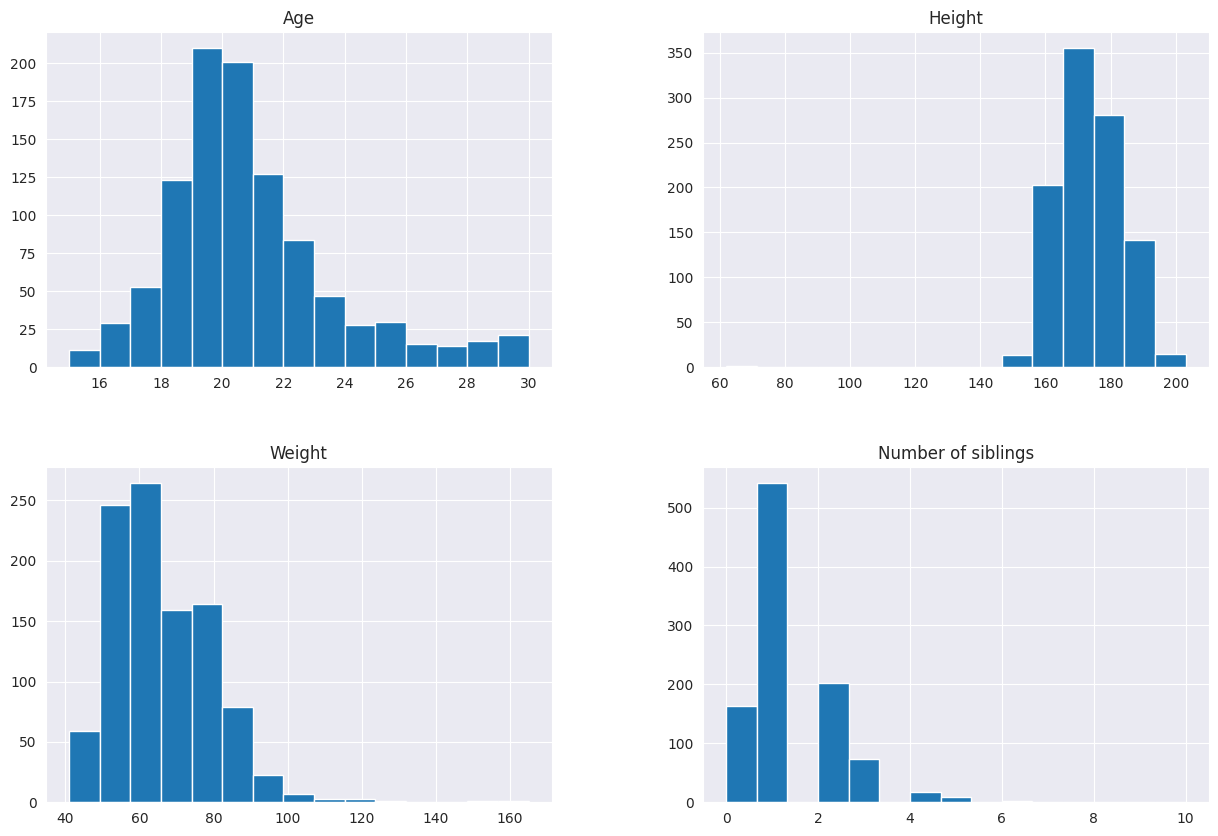

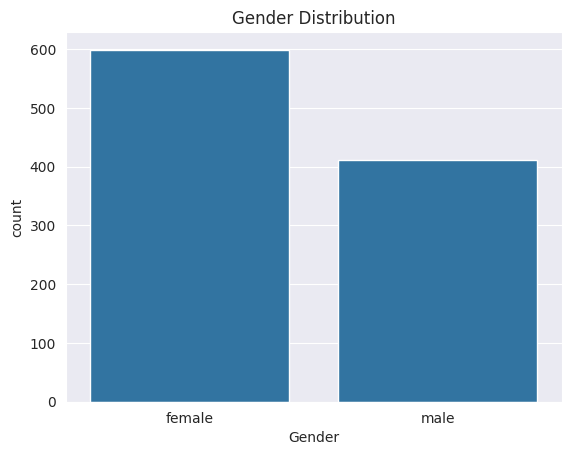

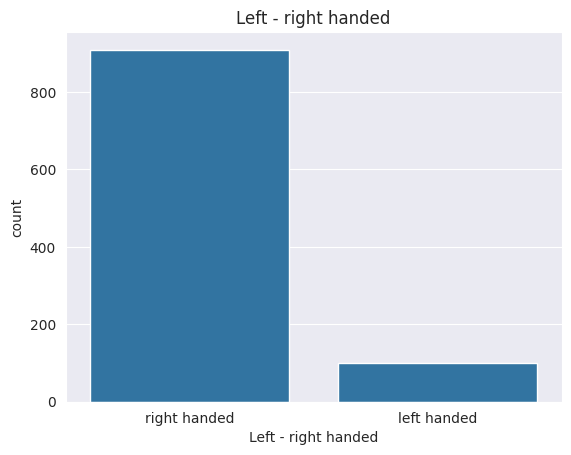

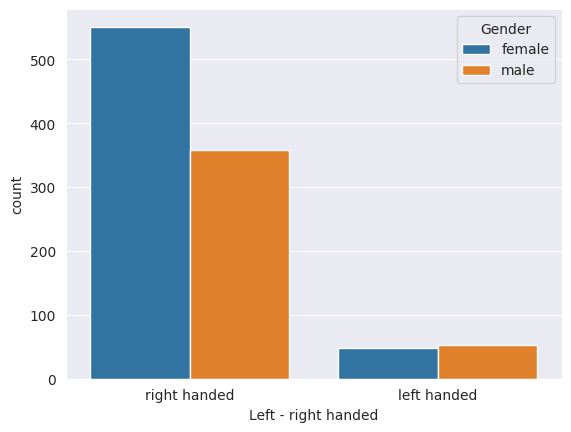

In [47]:
df_selected[demographics_columns].hist(bins=15, figsize=(15,10))
plt.show()

sns.countplot(data=df_selected, x='Gender')
plt.title('Gender Distribution')
plt.show()

sns.countplot(data=df_selected, x='Left - right handed')
plt.title('Left - right handed')
plt.show()

sns.countplot(data=df_selected, x="Left - right handed", hue="Gender");

### 7. Коррелированность между видами хобби

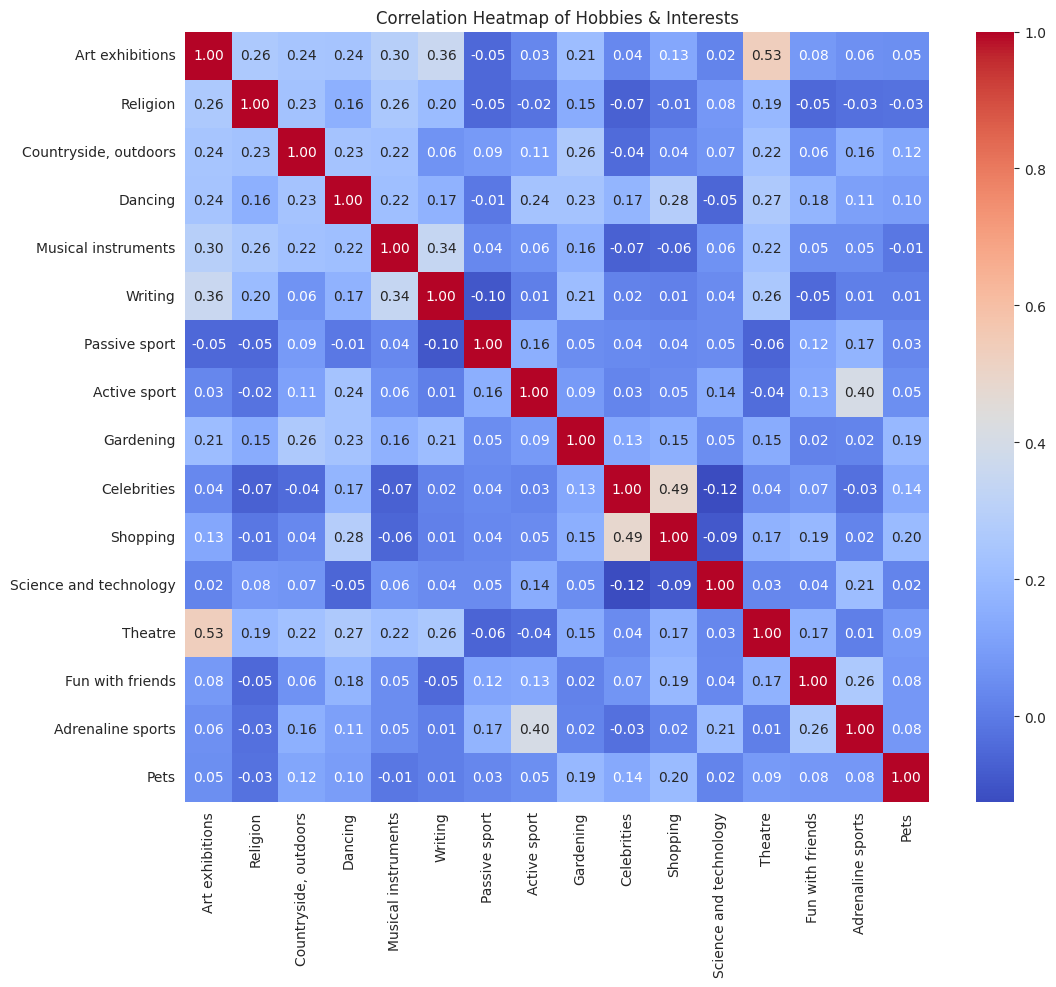

In [49]:
corr = df_selected[hobbies_columns[16:]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Hobbies & Interests')
plt.show()

### 8. Сделать разные копии датасетов (df1=df.copy())

In [62]:
df_onehot = df_selected.copy()
df_ordinal = df_selected.copy()

### 9. OneHotEncoder кодирование

In [63]:
from sklearn.preprocessing import OneHotEncoder


onehotencoder = OneHotEncoder(sparse_output=False)
cols = ['Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']
res = onehotencoder.fit_transform(df_onehot[cols])
encoded_df = pd.DataFrame(res, columns=onehotencoder.get_feature_names_out(cols))
df_onehot = pd.concat([df_onehot.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df_onehot.drop(['Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'], axis=1, inplace=True)
df_onehot.head()

,Age,Height,Weight,Number of siblings,History,Psychology,Politics,Mathematics,Physics,Internet,...,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,20.0,163.0,48.0,1.0,1.0,5.0,1.0,3.0,3.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,19.0,163.0,58.0,2.0,1.0,3.0,4.0,5.0,2.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,20.0,176.0,67.0,2.0,1.0,2.0,1.0,5.0,2.0,4.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,22.0,172.0,59.0,1.0,4.0,4.0,5.0,4.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,20.0,170.0,59.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


### 10. OrdinalEncoder кодирование

In [66]:
from sklearn.preprocessing import OrdinalEncoder

ordEnc = OrdinalEncoder()
df_ordinal[cols] = ordEnc.fit_transform(df_ordinal[cols])
df_ordinal.head()

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,20.0,163.0,48.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,19.0,163.0,58.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,20.0,176.0,67.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,22.0,172.0,59.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,20.0,170.0,59.0,1.0,0.0,1.0,5.0,0.0,1.0,1.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


### 11. Для закодированных наборов данных найти корреляцию между признаками


In [71]:
df_onehot.corr()

,Age,Height,Weight,Number of siblings,History,Psychology,Politics,Mathematics,Physics,Internet,...,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
Age,1.000000,0.114647,0.237011,0.090868,0.106101,-0.011165,0.087251,0.036923,0.109026,0.007945,...,0.124389,0.542206,-0.298535,-0.226752,0.099932,-0.099932,-0.009408,0.009408,-0.002135,0.002135
Height,0.114647,1.000000,0.674775,-0.013901,0.072278,-0.109307,0.152194,0.144852,0.221695,0.140815,...,0.057566,0.022482,-0.059988,0.042587,0.005522,-0.005522,0.023762,-0.023762,0.050208,-0.050208
Weight,0.237011,0.674775,1.000000,-0.026680,0.093506,-0.147050,0.123123,0.145015,0.236581,0.097873,...,0.178370,0.073459,-0.088207,-0.000642,-0.043181,0.043181,-0.007462,0.007462,-0.028262,0.028262
Number of siblings,0.090868,-0.013901,-0.026680,1.000000,-0.028646,-0.023555,-0.002971,0.082947,0.056633,-0.017502,...,0.035192,0.101128,0.030186,-0.107084,0.454546,-0.454546,-0.110546,0.110546,-0.086451,0.086451
History,0.106101,0.072278,0.093506,-0.028646,1.000000,0.285364,0.400856,0.011780,0.082372,0.022534,...,0.021975,0.041140,-0.074256,-0.012441,0.015483,-0.015483,0.016971,-0.016971,0.032026,-0.032026
Psychology,-0.011165,-0.109307,-0.147050,-0.023555,0.285364,1.000000,0.196043,0.045376,0.066406,-0.003746,...,0.014750,0.019910,-0.026328,0.005513,0.003559,-0.003559,0.050390,-0.050390,0.029820,-0.029820
Politics,0.087251,0.152194,0.123123,-0.002971,0.400856,0.196043,1.000000,0.103478,0.129599,0.058911,...,0.032993,0.019170,-0.061241,0.007680,-0.045625,0.045625,0.045144,-0.045144,0.032048,-0.032048
Mathematics,0.036923,0.144852,0.145015,0.082947,0.011780,0.045376,0.103478,1.000000,0.593086,0.154076,...,0.024366,0.078241,-0.031756,-0.049065,0.040150,-0.040150,-0.001984,0.001984,0.021104,-0.021104
Physics,0.109026,0.221695,0.236581,0.056633,0.082372,0.066406,0.129599,0.593086,1.000000,0.099124,...,0.042369,0.094620,-0.042355,-0.046590,0.019280,-0.019280,-0.024364,0.024364,-0.027235,0.027235
Internet,0.007945,0.140815,0.097873,-0.017502,0.022534,-0.003746,0.058911,0.154076,0.099124,1.000000,...,-0.044178,-0.036496,0.019880,-0.006658,0.003759,-0.003759,0.005665,-0.005665,0.054918,-0.054918


In [72]:
df_ordinal.corr()

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
Age,1.000000,0.114647,0.237011,0.090868,0.128732,-0.027524,-0.213051,-0.099932,0.009408,0.002135,...,-0.020218,0.024074,0.100653,-0.014460,-0.094979,0.111267,0.039740,-0.061280,-0.025421,-0.024122
Height,0.114647,1.000000,0.674775,-0.013901,0.678553,-0.071230,0.031604,-0.005522,-0.023762,-0.050208,...,0.105736,0.135052,-0.122475,-0.146191,-0.251763,0.281603,-0.252165,-0.014884,0.146542,-0.120373
Weight,0.237011,0.674775,1.000000,-0.026680,0.637344,-0.041655,-0.007761,0.043181,0.007462,0.028262,...,0.059547,0.116097,-0.061992,-0.109140,-0.248442,0.275582,-0.191440,-0.026316,0.120202,-0.070343
Number of siblings,0.090868,-0.013901,-0.026680,1.000000,0.034574,-0.085278,-0.070800,-0.454546,0.110546,0.086451,...,0.032843,-0.004403,0.044787,-0.078863,-0.066854,0.061676,-0.010698,0.023627,0.056258,-0.059082
Gender,0.128732,0.678553,0.637344,0.034574,1.000000,-0.079945,-0.019836,-0.024900,0.001447,0.003083,...,0.145848,0.198479,-0.156858,-0.247116,-0.383740,0.358491,-0.330196,-0.024419,0.180713,-0.147374
Left - right handed,-0.027524,-0.071230,-0.041655,-0.085278,-0.079945,1.000000,-0.006071,0.003043,-0.000723,-0.012764,...,-0.000947,-0.016936,-0.019692,0.014310,0.056277,-0.042601,0.053777,0.109879,0.022806,-0.038309
Education,-0.213051,0.031604,-0.007761,-0.070800,-0.019836,-0.006071,1.000000,0.015051,0.006174,-0.044887,...,0.047162,-0.058507,0.007823,-0.018084,0.014893,-0.039382,-0.030000,0.034193,-0.086732,0.017287
Only child,-0.099932,-0.005522,0.043181,-0.454546,-0.024900,0.003043,0.015051,1.000000,-0.040961,-0.015610,...,-0.050845,-0.016251,-0.015273,0.039953,0.051237,-0.046593,0.013340,0.030735,-0.012749,0.015159
Village - town,0.009408,-0.023762,0.007462,0.110546,0.001447,-0.000723,0.006174,-0.040961,1.000000,0.601867,...,0.013574,0.004713,0.158256,0.008456,-0.002694,0.038058,-0.008878,-0.006668,0.029660,0.070392
House - block of flats,0.002135,-0.050208,0.028262,0.086451,0.003083,-0.012764,-0.044887,-0.015610,0.601867,1.000000,...,0.015788,-0.001653,0.133471,0.051591,0.024271,0.047886,0.019592,-0.021680,0.007334,0.114012


In [83]:
grouped_data = df_ordinal.groupby('Left - right handed').mean().T
grouped_data

Left - right handed,0.0,1.0
Age,20.663366,20.404840
Height,175.623762,173.268427
Weight,68.069307,66.167217
Number of siblings,1.554455,1.267327
Gender,0.524752,0.393839
Education,3.693069,3.652365
Only child,0.247525,0.251925
Village - town,0.297030,0.295930
House - block of flats,0.425743,0.404840
History,3.346535,3.191419
